<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/_2soft_computing_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np # For numerical operations and array handling
import matplotlib.pyplot as plt # To create insightful plots.
from sklearn.datasets import make_classification # To generate a sample dataset, perform train-test splits, and evaluate our RBFN model.
from sklearn.model_selection import train_test_split # To standardize our dataset.
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist # For calculating pairwise distances between data points.

In [24]:
X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=42)
# generate a synthetic dataset with two features and two classes.

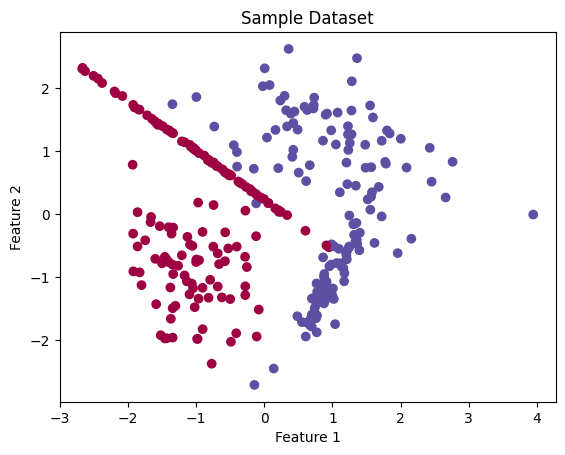

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# preprocess the data

In [27]:
def gaussian_rbf(x, center, sigma):
    return np.exp(-cdist(x, center, 'sqeuclidean') / (2 * sigma**2))

In [28]:
n_centers = 10  # Number of RBF centers
center_indices = np.random.choice(X.shape[0], n_centers, replace=False)
rbf_centers = X[center_indices]
rbf_width = 1.0

In [32]:
def rbf_layer(X, rbf_centers, rbf_width):
    return gaussian_rbf(X, rbf_centers, rbf_width)

def rbfn_predict(X, rbf_centers, rbf_width, weights):
    rbf_outputs = rbf_layer(X, rbf_centers, rbf_width)
    return rbf_outputs @ weights

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rbf_outputs_train = rbf_layer(X_train, rbf_centers, rbf_width)

# Perform linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(rbf_outputs_train, y_train)

# Make predictions on the test set
rbf_outputs_test = rbf_layer(X_test, rbf_centers, rbf_width)
y_pred = lr.predict(rbf_outputs_test)

# Evaluate the model
accuracy = accuracy_score(y_test, (y_pred >= 0.5).astype(int))
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.00%
